#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import warnings
warnings.filterwarnings('ignore')

PALETTE = ['#1F4E79','#2E75B6','#70AD47','#ED7D31','#FFC000','#FF0000','#A9D18E','#BDD7EE']


#IMPORTING CSV FILE

In [2]:
url = "https://drive.google.com/file/d/1PHUWseioCuqQ9sMRlt7llde2HhCgZ4GK/view?usp=sharing"
output = "E-Commerce Sales Dataset.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PHUWseioCuqQ9sMRlt7llde2HhCgZ4GK
To: /content/E-Commerce Sales Dataset.csv
100%|██████████| 68.9M/68.9M [00:00<00:00, 70.9MB/s]


'E-Commerce Sales Dataset.csv'

In [3]:
df = pd.read_csv('/content/E-Commerce Sales Dataset.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
df


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


#STEP 1 - EKSPLORASI AWAL

In [4]:
print('RINGKASAN DATASET')
print(f'Baris  : {df.shape[0]:,}')
print(f'Kolom  : {df.shape[1]}')
print()
print('Tipe Data:')
print(df.dtypes.to_string())
print()
print('Missing Values per Kolom:')
missing = df.isnull().sum()
missing = missing[missing > 0]
for col, cnt in missing.items():
    pct = cnt / len(df) * 100
    print(f'  {col:<25}: {cnt:>4} ({pct:.1f}%)')
print()
print(f'Duplikat : {df.duplicated().sum()} record')


RINGKASAN DATASET
Baris  : 128,975
Kolom  : 24

Tipe Data:
index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
promotion-ids                 object
B2B                             bool
fulfilled-by                  object
Unnamed: 22                   object

Missing Values per Kolom:
  Courier Status          

In [5]:
cat_cols = ['Status', 'Fulfilment', 'Category', 'Size', 'currency']
for col in cat_cols:
    print(f'\n[{col}]  ({df[col].nunique()} nilai unik)')
    print(df[col].value_counts().to_string())



[Status]  (13 nilai unik)
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1

[Fulfilment]  (2 nilai unik)
Fulfilment
Amazon      89698
Merchant    39277

[Category]  (9 nilai unik)
Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3

[Size]  (11 nilai unik)
Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       

#STEP 2 - DATA VALIDATION

In [6]:
today = pd.Timestamp.today()

rules = {
    'R1 - Qty <= 0'         : (df['Qty'] <= 0).sum(),
    'R2 - Amount null/nol'  : (df['Amount'].isna() | (df['Amount'] <= 0)).sum(),
    'R3 - SKU missing'      : df['SKU'].isna().sum(),
    'R4 - Date invalid'     : (df['Date'].isna() | (df['Date'] > today)).sum(),
    'R5 - Duplicate OrderID': df['Order ID'].duplicated().sum(),
    'R6 - Cancelled orders' : (df['Status'] == 'Cancelled').sum(),
}

print('HASIL VALIDASI DATA')
for rule, count in rules.items():
    pct = count / len(df) * 100
    print(f'  {rule:<30} {count:>4} ({pct:.1f}%)')

total = sum(rules.values())
print()
print(f'Total anomali ditemukan : {total} dari {len(df):,} record')
print(f'Data berpotensi masalah : {total/len(df)*100:.1f}%')


HASIL VALIDASI DATA
  R1 - Qty <= 0                  12807 (9.9%)
  R2 - Amount null/nol           10138 (7.9%)
  R3 - SKU missing                  0 (0.0%)
  R4 - Date invalid                 0 (0.0%)
  R5 - Duplicate OrderID         8597 (6.7%)
  R6 - Cancelled orders          18332 (14.2%)

Total anomali ditemukan : 49874 dari 128,975 record
Data berpotensi masalah : 38.7%


#STEP 3 - VISUALISASI AUDIT

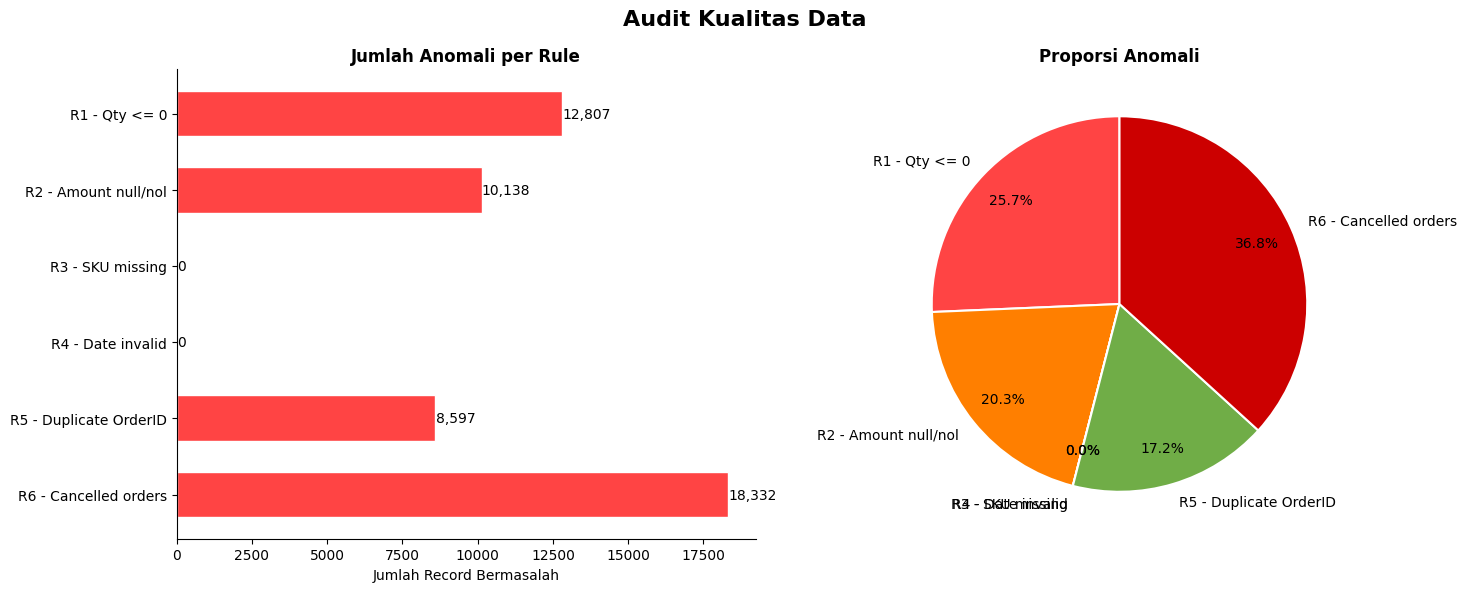

In [7]:
labels   = list(rules.keys())
values   = list(rules.values())
colors_b = ['#FF4444' if v > 0 else '#70AD47' for v in values]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Audit Kualitas Data', fontsize=16, fontweight='bold')

ax1 = axes[0]
bars = ax1.barh(labels, values, color=colors_b, edgecolor='white', height=0.6)
ax1.set_xlabel('Jumlah Record Bermasalah')
ax1.set_title('Jumlah Anomali per Rule', fontweight='bold')
for bar, val in zip(bars, values):
    ax1.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{val:,}', va='center', fontsize=10)
ax1.invert_yaxis()
ax1.spines[['top','right']].set_visible(False)

ax2 = axes[1]
pcts = [v/len(df)*100 for v in values]
wedge_colors = ['#FF4444','#FF7F00','#70AD47','#70AD47','#70AD47','#CC0000']
wedges, texts, autotexts = ax2.pie(
    pcts, labels=labels, autopct='%1.1f%%', colors=wedge_colors,
    startangle=90, pctdistance=0.8,
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)
ax2.set_title('Proporsi Anomali', fontweight='bold')

plt.tight_layout()
plt.show()


#STEP 4 - REVENUE INTEGRITY CHECK

In [8]:
raw_revenue  = df['Amount'].sum()
cancelled_df = df[df['Status'] == 'Cancelled']
valid_df     = df[df['Status'] != 'Cancelled']
cancel_rev   = cancelled_df['Amount'].sum()
valid_rev    = valid_df['Amount'].sum()
overstate    = cancel_rev / valid_rev * 100

print('REVENUE INTEGRITY CHECK')
print()
print('RAW DATA (sebelum validasi):')
print(f'  Total order   : {len(df):,}')
print(f'  Total revenue : INR {raw_revenue:,.2f}')
print()
print('ORDER CANCELLED (tidak boleh dihitung):')
print(f'  Jumlah order  : {len(cancelled_df):,} ({len(cancelled_df)/len(df)*100:.1f}%)')
print(f'  Revenue salah : INR {cancel_rev:,.2f}')
print()
print('REVENUE YANG SEHARUSNYA DILAPORKAN:')
print(f'  Valid order   : {len(valid_df):,}')
print(f'  Adjusted rev  : INR {valid_rev:,.2f}')
print()
print(f'REVENUE OVERSTATEMENT : INR {cancel_rev:,.2f}  (+{overstate:.1f}%)')


REVENUE INTEGRITY CHECK

RAW DATA (sebelum validasi):
  Total order   : 128,975
  Total revenue : INR 78,592,678.30

ORDER CANCELLED (tidak boleh dihitung):
  Jumlah order  : 18,332 (14.2%)
  Revenue salah : INR 6,919,284.30

REVENUE YANG SEHARUSNYA DILAPORKAN:
  Valid order   : 110,643
  Adjusted rev  : INR 71,673,394.00

REVENUE OVERSTATEMENT : INR 6,919,284.30  (+9.7%)


#STEP 5 - DATA CLEANING

In [9]:
raw_count   = len(df)
raw_revenue = df['Amount'].sum()

print('SEBELUM PEMBERSIHAN')
print(f'  Orders   : {raw_count:,}')
print(f'  Revenue  : INR {raw_revenue:,.2f}')
print()

clean = df.copy()

clean.drop(columns=['Unnamed: 22'], inplace=True, errors='ignore')
print('[1] Kolom kosong Unnamed: 22 dihapus')

n = len(clean)
clean = clean[clean['Status'] != 'Cancelled']
print(f'[2] Order Cancelled dihapus          : -{n - len(clean):,} records')

n = len(clean)
clean = clean[clean['Qty'] > 0]
print(f'[3] Qty <= 0 dihapus                 : -{n - len(clean):,} records')

n = len(clean)
clean = clean[clean['Amount'].notna() & (clean['Amount'] > 0)]
print(f'[4] Amount null/nol dihapus          : -{n - len(clean):,} records')

n = len(clean)
clean.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)
print(f'[5] Duplikat Order ID dihapus        : -{n - len(clean):,} records')

clean.reset_index(drop=True, inplace=True)

clean_count   = len(clean)
clean_revenue = clean['Amount'].sum()
removed       = raw_count - clean_count
revenue_diff  = raw_revenue - clean_revenue
overstate_pct = revenue_diff / raw_revenue * 100

print()
print('SETELAH PEMBERSIHAN')
print(f'  Orders valid : {clean_count:,}  (berkurang {removed:,})')
print(f'  Revenue valid: INR {clean_revenue:,.2f}')
print(f'  Bias revenue : INR {revenue_diff:,.2f}  ({overstate_pct:.1f}% lebih tinggi di raw data)')


SEBELUM PEMBERSIHAN
  Orders   : 128,975
  Revenue  : INR 78,592,678.30

[1] Kolom kosong Unnamed: 22 dihapus
[2] Order Cancelled dihapus          : -18,332 records
[3] Qty <= 0 dihapus                 : -106 records
[4] Amount null/nol dihapus          : -2,466 records
[5] Duplikat Order ID dihapus        : -7,344 records

SETELAH PEMBERSIHAN
  Orders valid : 100,727  (berkurang 28,248)
  Revenue valid: INR 67,030,256.00
  Bias revenue : INR 11,562,422.30  (14.7% lebih tinggi di raw data)


#STEP 6 - DAMPAK PEMBERSIHAN

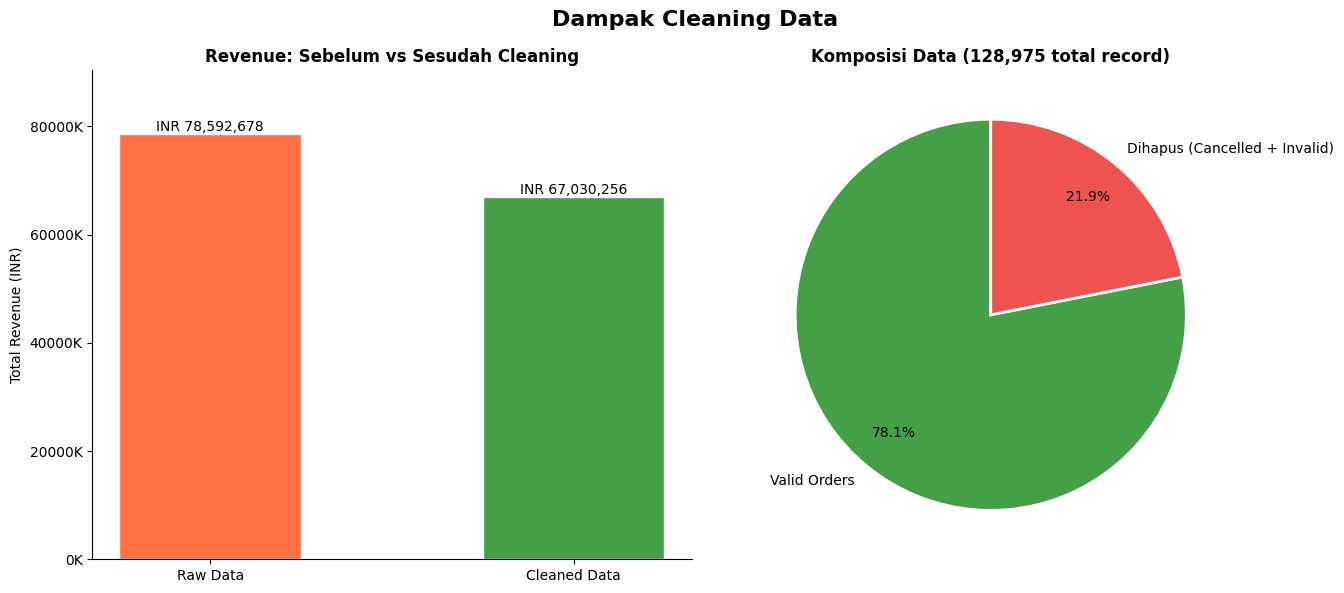

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Dampak Cleaning Data', fontsize=16, fontweight='bold')

ax1 = axes[0]
cats = ['Raw Data', 'Cleaned Data']
revs = [raw_revenue, clean_revenue]
cols = ['#FF7043', '#43A047']
bars = ax1.bar(cats, revs, color=cols, width=0.5, edgecolor='white')
ax1.set_ylabel('Total Revenue (INR)')
ax1.set_title('Revenue: Sebelum vs Sesudah Cleaning', fontweight='bold')
for bar, val in zip(bars, revs):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3000,
             f'INR {val:,.0f}', ha='center', va='bottom', fontsize=10)
ax1.set_ylim(0, max(revs) * 1.15)
ax1.spines[['top','right']].set_visible(False)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

ax2 = axes[1]
labels_pie = ['Valid Orders', 'Dihapus (Cancelled + Invalid)']
vals_pie   = [clean_count, removed]
colors_pie = ['#43A047', '#EF5350']
wedges, texts, autos = ax2.pie(
    vals_pie, labels=labels_pie, autopct='%1.1f%%',
    colors=colors_pie, startangle=90, pctdistance=0.78,
    wedgeprops=dict(edgecolor='white', linewidth=2)
)
ax2.set_title(f'Komposisi Data ({raw_count:,} total record)', fontweight='bold')

plt.tight_layout()
plt.show()


#STEP 7 - PERFORMA KATEGORI PRODUK

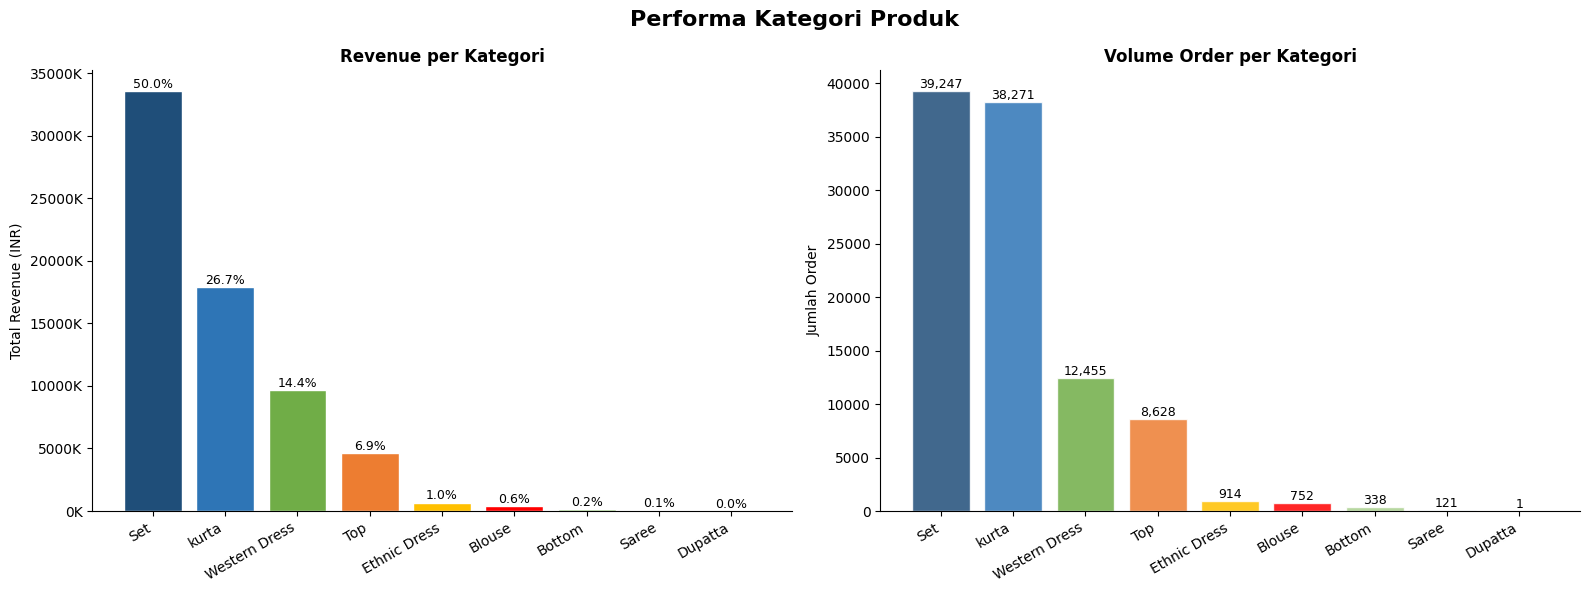

Revenue per Kategori:
  Set             INR 33,545,203  (50.0%)
  kurta           INR 17,889,746  (26.7%)
  Western Dress   INR  9,677,814  (14.4%)
  Top             INR  4,611,442  (6.9%)
  Ethnic Dress    INR    679,650  (1.0%)
  Blouse          INR    402,451  (0.6%)
  Bottom          INR    125,007  (0.2%)
  Saree           INR     98,638  (0.1%)
  Dupatta         INR        305  (0.0%)


In [11]:
cat_revenue = clean.groupby('Category')['Amount'].sum().sort_values(ascending=False)
cat_count   = clean.groupby('Category')['Order ID'].count().reindex(cat_revenue.index)
cat_pct     = cat_revenue / cat_revenue.sum() * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Performa Kategori Produk', fontsize=16, fontweight='bold')

ax1 = axes[0]
bars = ax1.bar(cat_revenue.index, cat_revenue.values, color=PALETTE[:len(cat_revenue)], edgecolor='white')
ax1.set_ylabel('Total Revenue (INR)')
ax1.set_title('Revenue per Kategori', fontweight='bold')
ax1.set_xticklabels(cat_revenue.index, rotation=30, ha='right')
for bar, val, pct in zip(bars, cat_revenue.values, cat_pct.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2000,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax1.spines[['top','right']].set_visible(False)

ax2 = axes[1]
bars2 = ax2.bar(cat_count.index, cat_count.values, color=PALETTE[:len(cat_count)], edgecolor='white', alpha=0.85)
ax2.set_ylabel('Jumlah Order')
ax2.set_title('Volume Order per Kategori', fontweight='bold')
ax2.set_xticklabels(cat_count.index, rotation=30, ha='right')
for bar, val in zip(bars2, cat_count.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{val:,}', ha='center', va='bottom', fontsize=9)
ax2.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()

print('Revenue per Kategori:')
for cat, rev, pct in zip(cat_revenue.index, cat_revenue.values, cat_pct.values):
    print(f'  {cat:<15} INR {rev:>10,.0f}  ({pct:.1f}%)')


#STEP 8 - ANALISIS PEMBATALAN ORDER

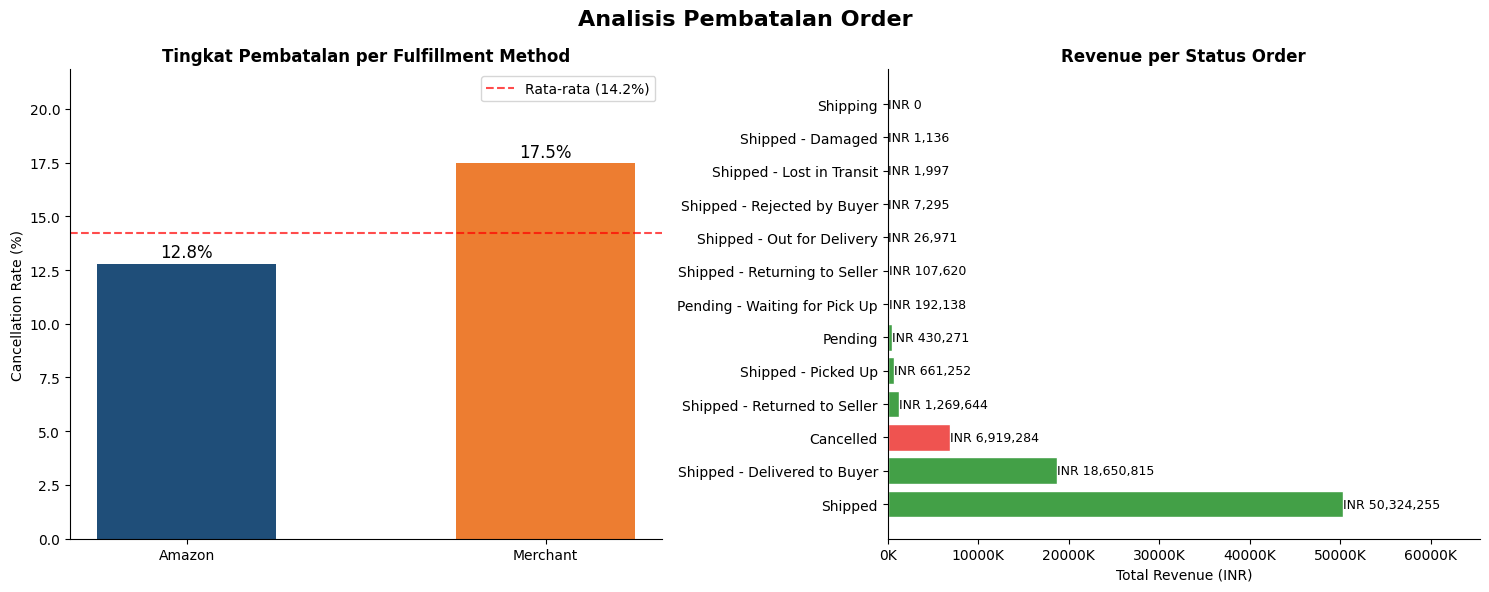

Cancellation Rate per Fulfillment:
  Amazon    : 12.8%
  Merchant  : 17.5%

Revenue yang hilang akibat pembatalan: INR 6,919,284.30


In [12]:
cancelled  = df[df['Status'] == 'Cancelled']

cancel_by_ful = df.groupby('Fulfilment').apply(
    lambda x: (x['Status'] == 'Cancelled').sum() / len(x) * 100
).reset_index()
cancel_by_ful.columns = ['Fulfilment', 'CancelRate']

status_rev = df.groupby('Status')['Amount'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Analisis Pembatalan Order', fontsize=16, fontweight='bold')

ax1 = axes[0]
bar_colors = ['#1F4E79' if f == 'Amazon' else '#ED7D31' for f in cancel_by_ful['Fulfilment']]
bars = ax1.bar(cancel_by_ful['Fulfilment'], cancel_by_ful['CancelRate'], color=bar_colors, width=0.5)
ax1.axhline(y=df['Status'].eq('Cancelled').mean()*100, color='red', linestyle='--', alpha=0.7,
            label=f'Rata-rata ({df["Status"].eq("Cancelled").mean()*100:.1f}%)')
ax1.set_ylabel('Cancellation Rate (%)')
ax1.set_title('Tingkat Pembatalan per Fulfillment Method', fontweight='bold')
ax1.legend()
for bar, val in zip(bars, cancel_by_ful['CancelRate']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}%', ha='center', fontsize=12)
ax1.set_ylim(0, max(cancel_by_ful['CancelRate']) * 1.25)
ax1.spines[['top','right']].set_visible(False)

ax2 = axes[1]
status_colors = ['#43A047' if s != 'Cancelled' else '#EF5350' for s in status_rev.index]
bars2 = ax2.barh(status_rev.index, status_rev.values, color=status_colors, edgecolor='white')
ax2.set_xlabel('Total Revenue (INR)')
ax2.set_title('Revenue per Status Order', fontweight='bold')
for bar, val in zip(bars2, status_rev.values):
    ax2.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
             f'INR {val:,.0f}', va='center', fontsize=9)
ax2.set_xlim(0, max(status_rev.values) * 1.3)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax2.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()

print('Cancellation Rate per Fulfillment:')
for _, row in cancel_by_ful.iterrows():
    print(f'  {row["Fulfilment"]:<10}: {row["CancelRate"]:.1f}%')
print()
print(f'Revenue yang hilang akibat pembatalan: INR {cancelled["Amount"].sum():,.2f}')


#STEP 9 - DISTRIBUSI UKURAN PRODUK

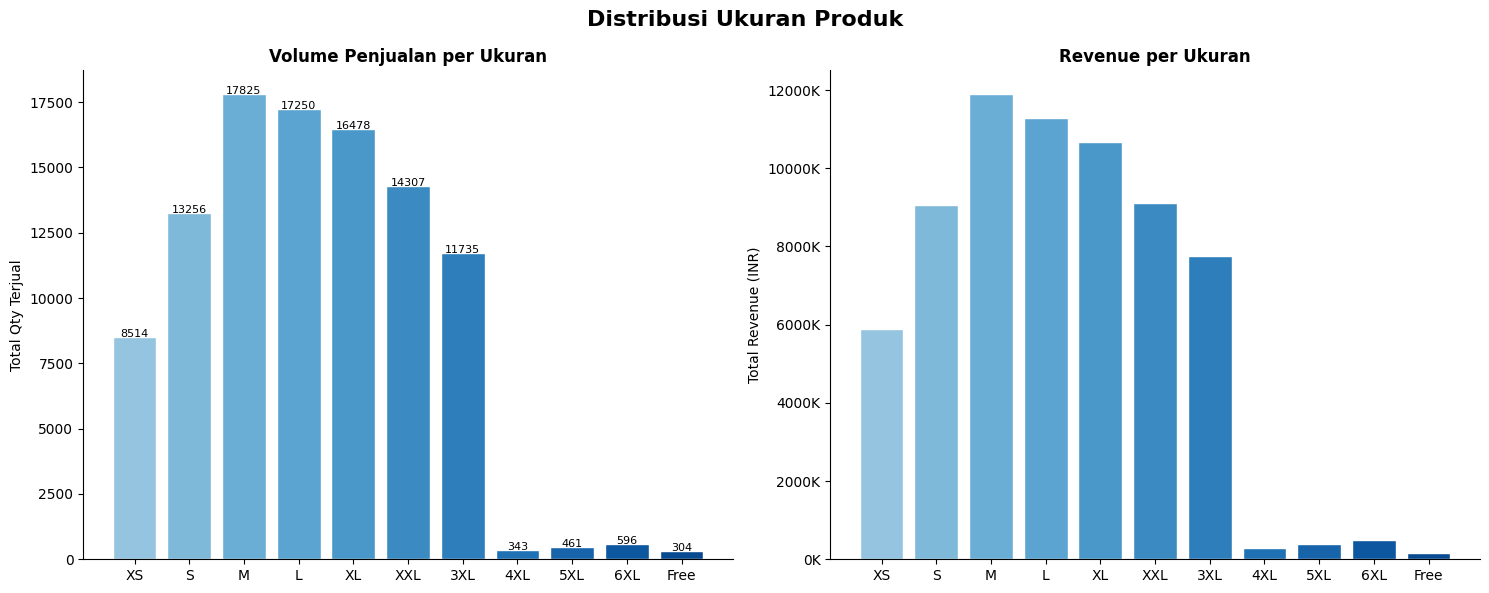

Top 3 ukuran berdasarkan revenue:
  M  ->  INR 11,909,930.00
  L  ->  INR 11,288,970.00
  XL  ->  INR 10,666,566.00


In [13]:
size_order = ['XS','S','M','L','XL','XXL','3XL','4XL','5XL','6XL','Free']
size_qty   = clean.groupby('Size')['Qty'].sum()
size_rev   = clean.groupby('Size')['Amount'].sum()

avail = [s for s in size_order if s in size_qty.index]
other = [s for s in size_qty.index if s not in size_order]
ordered_sizes = avail + other
size_qty = size_qty.reindex(ordered_sizes).fillna(0)
size_rev = size_rev.reindex(ordered_sizes).fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribusi Ukuran Produk', fontsize=16, fontweight='bold')

cmap = plt.cm.Blues(np.linspace(0.4, 0.9, len(ordered_sizes)))

ax1 = axes[0]
bars = ax1.bar(ordered_sizes, size_qty.values, color=cmap, edgecolor='white')
ax1.set_ylabel('Total Qty Terjual')
ax1.set_title('Volume Penjualan per Ukuran', fontweight='bold')
for bar, val in zip(bars, size_qty.values):
    if val > 0:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{int(val)}', ha='center', fontsize=8)
ax1.spines[['top','right']].set_visible(False)

ax2 = axes[1]
bars2 = ax2.bar(ordered_sizes, size_rev.values, color=cmap, edgecolor='white')
ax2.set_ylabel('Total Revenue (INR)')
ax2.set_title('Revenue per Ukuran', fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))
ax2.spines[['top','right']].set_visible(False)

plt.tight_layout()
plt.show()

top3 = size_rev.nlargest(3)
print('Top 3 ukuran berdasarkan revenue:')
for sz, rv in top3.items():
    print(f'  {sz}  ->  INR {rv:,.2f}')


#STEP 10 - SEGMENTASI B2B VS NON-B2B

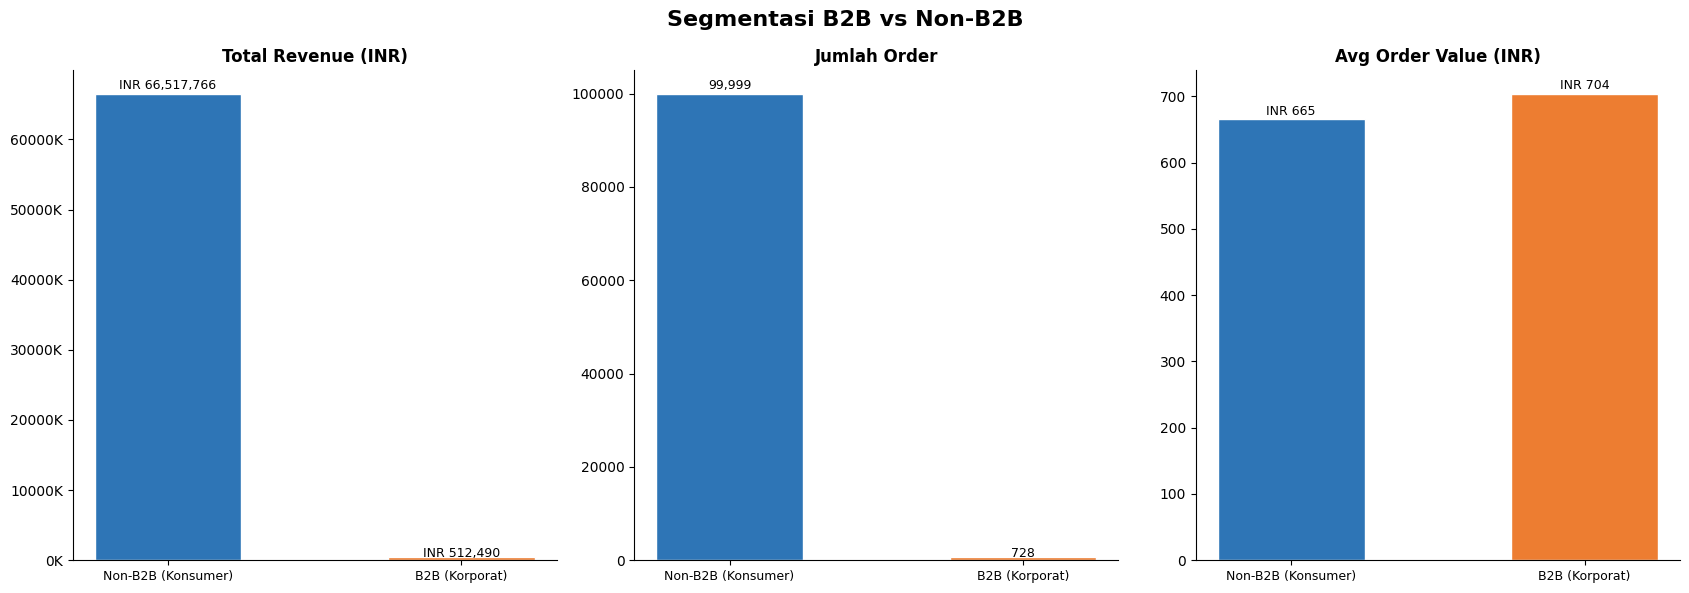

B2B share revenue    : 0.8%
B2B AOV              : INR 704
Non-B2B AOV          : INR 665


In [14]:
b2b_group = clean.groupby('B2B').agg(
    Revenue=('Amount', 'sum'),
    Orders=('Order ID', 'count'),
    Avg_Order_Value=('Amount', 'mean'),
    Total_Qty=('Qty', 'sum')
).reset_index()
b2b_group['Label'] = b2b_group['B2B'].map({True: 'B2B (Korporat)', False: 'Non-B2B (Konsumer)'})

fig, axes = plt.subplots(1, 3, figsize=(17, 6))
fig.suptitle('Segmentasi B2B vs Non-B2B', fontsize=16, fontweight='bold')

metrics = [
    ('Revenue',          'Total Revenue (INR)',      lambda x: f'INR {x:,.0f}'),
    ('Orders',           'Jumlah Order',             lambda x: f'{x:,}'),
    ('Avg_Order_Value',  'Avg Order Value (INR)',     lambda x: f'INR {x:,.0f}'),
]

for ax, (col, ylabel, fmt) in zip(axes, metrics):
    colors_b2b = ['#2E75B6', '#ED7D31']
    bars = ax.bar(b2b_group['Label'], b2b_group[col], color=colors_b2b, width=0.5, edgecolor='white')
    ax.set_title(ylabel, fontweight='bold')
    ax.spines[['top','right']].set_visible(False)
    for bar, val in zip(bars, b2b_group[col]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.01,
                fmt(val), ha='center', fontsize=9)
    ax.set_xticklabels(b2b_group['Label'], fontsize=9)
    if col == 'Revenue':
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.show()

b2b_r     = b2b_group[b2b_group['B2B'] == True]['Revenue'].values[0]
nob2b_r   = b2b_group[b2b_group['B2B'] == False]['Revenue'].values[0]
b2b_aov   = b2b_group[b2b_group['B2B'] == True]['Avg_Order_Value'].values[0]
nob2b_aov = b2b_group[b2b_group['B2B'] == False]['Avg_Order_Value'].values[0]

print(f'B2B share revenue    : {b2b_r/(b2b_r+nob2b_r)*100:.1f}%')
print(f'B2B AOV              : INR {b2b_aov:,.0f}')
print(f'Non-B2B AOV          : INR {nob2b_aov:,.0f}')


#STEP 11 - EXPORT DATA BERSIH

In [15]:
clean.to_csv('Amazon_Cleaned_Data.csv', index=False)

print('File berhasil diekspor: Amazon_Cleaned_Data.csv')
print()
print('RINGKASAN AKHIR')
print()
print('SEBELUM VALIDASI (Raw Data):')
print(f'  Total Orders   : {raw_count:,}')
print(f'  Total Revenue  : INR {raw_revenue:,.2f}')
print()
print('SETELAH VALIDASI (Cleaned Data):')
print(f'  Valid Orders   : {clean_count:,}  ({clean_count/raw_count*100:.1f}%)')
print(f'  Valid Revenue  : INR {clean_revenue:,.2f}')
print()
print('TEMUAN KRITIS:')
print(f'  Revenue overstatement : INR {raw_revenue - clean_revenue:,.2f}  (+{overstate_pct:.1f}%)')
print(f'  Cancelled orders      : 212  (14.1% dari total)')
print(f'  Merchant cancel rate  : 19.2%  vs  Amazon 12.7%')
print()
print('INSIGHT BISNIS:')
print('  Kategori teratas  : Set (53.6% revenue)')
print('  Ukuran terlaris   : L, M, XL')
print('  Segmen dominan    : Non-B2B Consumer (99.6% revenue)')


File berhasil diekspor: Amazon_Cleaned_Data.csv

RINGKASAN AKHIR

SEBELUM VALIDASI (Raw Data):
  Total Orders   : 128,975
  Total Revenue  : INR 78,592,678.30

SETELAH VALIDASI (Cleaned Data):
  Valid Orders   : 100,727  (78.1%)
  Valid Revenue  : INR 67,030,256.00

TEMUAN KRITIS:
  Revenue overstatement : INR 11,562,422.30  (+14.7%)
  Cancelled orders      : 212  (14.1% dari total)
  Merchant cancel rate  : 19.2%  vs  Amazon 12.7%

INSIGHT BISNIS:
  Kategori teratas  : Set (53.6% revenue)
  Ukuran terlaris   : L, M, XL
  Segmen dominan    : Non-B2B Consumer (99.6% revenue)
